In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
file = files.upload()

Saving used_car_data.csv to used_car_data (1).csv


In [ ]:
df = pd.read_csv('used_car_data.csv')
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [ ]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


1) Merk apa saja yang tersedia dan berapa banyak mobil untuk tiap merk?

In [ ]:
df['Name'].value_counts()

Mahindra XUV500 W8 2WD                49
Maruti Swift VDI                      45
Maruti Swift Dzire VDI                34
Honda City 1.5 S MT                   34
Maruti Swift VDI BSIV                 31
                                      ..
Maruti Celerio ZXI AMT                 1
Skoda Rapid 1.6 MPI Active             1
Maruti Swift AMT VDI                   1
Volkswagen Tiguan 2.0 TDI Highline     1
Mahindra Bolero mHAWK D70 ZLX          1
Name: Name, Length: 1876, dtype: int64

In [ ]:
# Split brand and brand type
mobil_brand = df['Name'].str.split(" ", expand=True)[0]

In [ ]:
# Transform duplicated ISUZU --> Isuzu
mobil_brand = mobil_brand.str.replace('ISUZU', 'Isuzu')

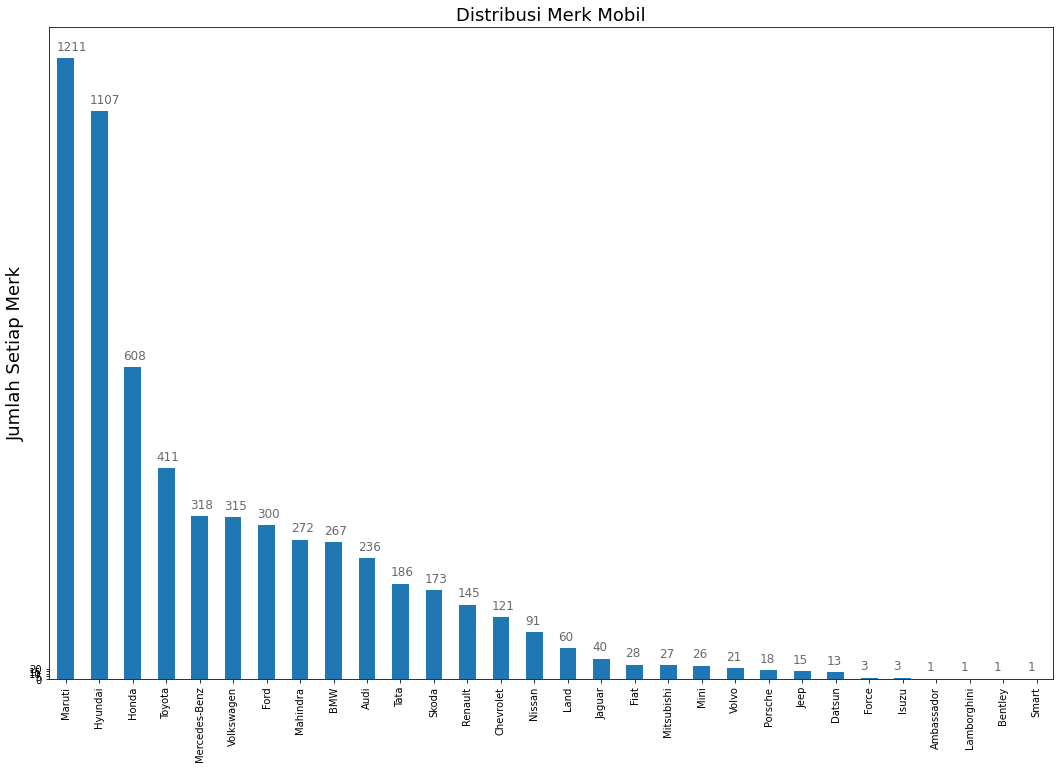

In [ ]:
plt.figure(figsize=(18, 12))
ax = mobil_brand.value_counts().plot(kind='bar')
ax.set_alpha(0.8)
ax.set_title("Distribusi Merk Mobil", fontsize=18)
ax.set_ylabel("Jumlah Setiap Merk", fontsize=18);
ax.set_yticks([0, 5, 10, 15, 20])

# totals = []

# for i in ax.patches:
#     totals.append(i.get_height())

# total = sum(totals)

# Annotate bar chart
for i in ax.patches:
    ax.text(i.get_x()-.03, i.get_height()+15, \
            str(i.get_height()), fontsize=12,
                color='dimgrey')

Double brand : ISUZU & Isuzu

In [ ]:
# Proportion
display(round(mobil_brand.value_counts()*100/np.sum(mobil_brand.value_counts()),2))

Maruti           20.12
Hyundai          18.39
Honda            10.10
Toyota            6.83
Mercedes-Benz     5.28
Volkswagen        5.23
Ford              4.98
Mahindra          4.52
BMW               4.44
Audi              3.92
Tata              3.09
Skoda             2.87
Renault           2.41
Chevrolet         2.01
Nissan            1.51
Land              1.00
Jaguar            0.66
Fiat              0.47
Mitsubishi        0.45
Mini              0.43
Volvo             0.35
Porsche           0.30
Jeep              0.25
Datsun            0.22
Force             0.05
Isuzu             0.05
Ambassador        0.02
Lamborghini       0.02
Bentley           0.02
Smart             0.02
Name: 0, dtype: float64

2) Kota apa yang memiliki mobil bekas paling banyak?

In [ ]:
# Filter Owner_Type
mobil_second = df[['Location', 'Owner_Type']][df['Owner_Type'] != 'First']

In [ ]:
desc_mobil_second = mobil_second.describe()

In [ ]:
# Group Owner Type and Location by counting owner type for each location
dist = mobil_second.groupby(['Owner_Type','Location'])['Location'].count()
dist.columns = ['Owner_Type', 'Location', 'Total']
dist_reset = dist.reset_index(name='Total')

In [ ]:
dist

Owner_Type      Location  
Fourth & Above  Bangalore       1
                Chennai         2
                Coimbatore      1
                Jaipur          1
                Mumbai          2
                Pune            2
Second          Ahmedabad      38
                Bangalore     114
                Chennai       121
                Coimbatore     63
                Delhi          94
                Hyderabad      84
                Jaipur         97
                Kochi          34
                Kolkata        32
                Mumbai        121
                Pune          170
Third           Bangalore      12
                Chennai        36
                Coimbatore      1
                Delhi           3
                Jaipur         15
                Kochi           3
                Mumbai         14
                Pune           29
Name: Location, dtype: int64

In [ ]:
# Re index & order to see clearly the distribution
pt_dist = pd.pivot_table(dist_reset, values ='Total', columns='Owner_Type', index='Location', aggfunc=sum, margins=True)

# Fill NaN value with 0 and transform dtype into integer
pt_dist[['Fourth & Above', 'Second', 'Third']] = pt_dist[['Fourth & Above', 'Second', 'Third']].fillna(0).astype(int)

# Reordering pt_dist column
pt_dist = pt_dist[['Second', 'Third', 'Fourth & Above', 'All']]

In [ ]:
pt_dist = pt_dist.sort_values('All')
pt_dist

Owner_Type,Second,Third,Fourth & Above,All
Location,,,,
Kolkata,32,0,0,32
Kochi,34,3,0,37
Ahmedabad,38,0,0,38
Coimbatore,63,1,1,65
Hyderabad,84,0,0,84
Delhi,94,3,0,97
Jaipur,97,15,1,113
Bangalore,114,12,1,127
Mumbai,121,14,2,137


In [ ]:
from pandas.plotting import table


In [ ]:
# # Save table df into png
# ax1 = plt.subplot(511, frame_on=False) 
# ax1.xaxis.set_visible(False)  
# ax1.yaxis.set_visible(False)  

# table(ax1, impact_pivot)  

# plt.savefig('mytable.png')

3) Bagaimana distribusi tahun edisi mobil-mobil bekas tersebut?

In [ ]:
# Filter Owner_Type
dist_mobil_bekas = df[['Year', 'Name']][df['Owner_Type'] != 'First']

In [ ]:
dist_mobil_bekas.groupby(['Name', 'Year']).count().sort_values('Year')

,
Name,Year
Maruti 1000 AC,1998
Maruti Zen LX,1998
Maruti Zen LXI,1998
Maruti Zen VX,1999
Tata Sumo Delux,2000
...,...
Renault KWID Climber 1.0 AMT,2018
Volkswagen Vento 1.6 Comfortline,2018
Hyundai i20 1.4 Sportz,2018


In [ ]:
dist_mobil_bekas['Name'] = dist_mobil_bekas.Name.str.split(" ", expand=True)[0]

In [ ]:
dist_mobil_bekas

,Year,Name
4,2013,Audi
9,2012,Tata
14,2012,Land
21,2015,Maruti
27,2013,Maruti
...,...,...
5994,2009,Honda
5998,2010,Volkswagen
6000,2014,Hyundai
6008,2013,Porsche


In [ ]:
mob_bekas_group = dist_mobil_bekas.groupby(['Name', 'Year'])['Year'].count()
mob_bekas_group

Name        Year
Ambassador  2003    1
Audi        2008    5
            2009    4
            2011    4
            2012    7
                   ..
Volkswagen  2018    1
Volvo       2010    1
            2012    1
            2014    1
            2015    2
Name: Year, Length: 235, dtype: int64

In [ ]:
# Re index & order to see clearly the distribution
mob_bekas_year = pd.pivot_table(mob_bekas_group.reset_index(name='Total'), values ='Total', columns='Year', index='Name', aggfunc=sum, margins=True)

# Fill NaN value with 0 and transform dtype into integer
mob_bekas_year.iloc[0:-1] = mob_bekas_year.iloc[0:-1].fillna(0).astype(int)


In [ ]:
mob_bekas_year

Year,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,All
Name,,,,,,,,,,,,,,,,,,,,,,
Ambassador,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Audi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,4.0,7.0,8.0,9.0,5.0,3.0,2.0,0.0,47
BMW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0,7.0,5.0,8.0,13.0,7.0,3.0,4.0,4.0,1.0,0.0,62
Chevrolet,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,3.0,4.0,7.0,4.0,4.0,2.0,0.0,1.0,0.0,1.0,32
Fiat,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,8
Ford,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,6.0,7.0,9.0,2.0,12.0,7.0,2.0,7.0,4.0,4.0,0.0,2.0,0.0,66
Honda,0.0,0.0,0.0,1.0,1.0,0.0,4.0,5.0,7.0,11.0,12.0,10.0,8.0,6.0,11.0,7.0,17.0,3.0,2.0,3.0,0.0,108
Hyundai,0.0,0.0,0.0,2.0,2.0,2.0,1.0,10.0,7.0,10.0,18.0,17.0,22.0,16.0,22.0,17.0,15.0,22.0,6.0,5.0,1.0,195
Jaguar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,4


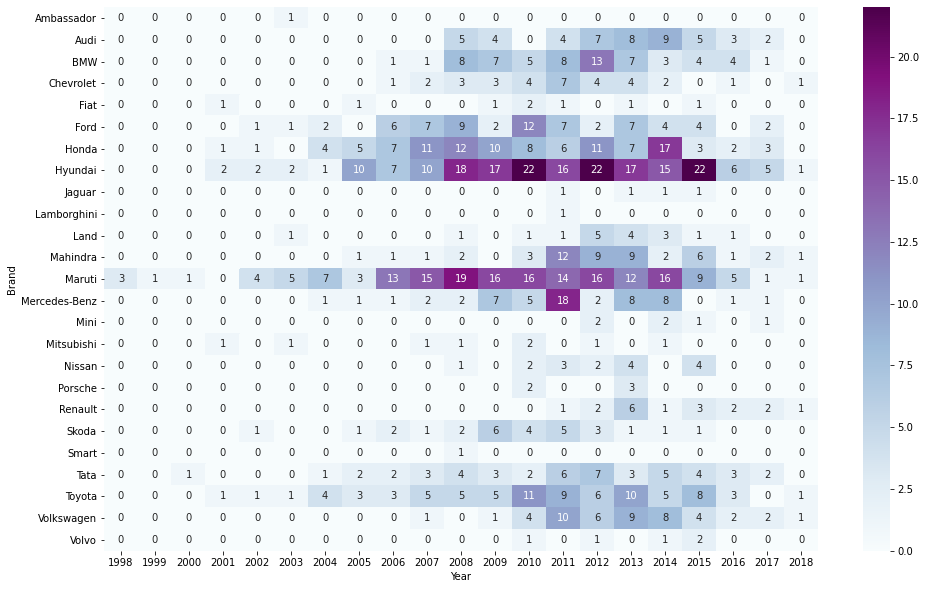

In [ ]:
# Plot with heatmap
plt.figure(figsize=(16,10))
sns.heatmap(mob_bekas_year.drop('All', axis=1).drop('All', axis=0), annot=True, cmap='BuPu')
plt.xlabel('Year')
plt.ylabel('Brand')
plt.show()

It's too wide and hard to interpret

In [ ]:
# Binning Year
bins = np.array([1997, 2002, 2007, 2012, 2018])
mob_bekas_reindex = mob_bekas_group.reset_index(name='Total')
mob_bekas_reindex['Year_Range'] = pd.cut(mob_bekas_reindex.Year, bins=bins, labels=['1998-2002', '2003-2007', '2008-2012', '2013-2018'])

In [ ]:
mob_bekas_reindex.sort_values('Year')

,Name,Year,Total,Year_Range
115,Maruti,1998,3,1998-2002
116,Maruti,1999,1,1998-2002
188,Tata,2000,1,1998-2002
117,Maruti,2000,1,1998-2002
33,Fiat,2001,1,1998-2002
...,...,...,...,...
32,Chevrolet,2018,1,2013-2018
230,Volkswagen,2018,1,2013-2018
219,Toyota,2018,1,2013-2018
174,Renault,2018,1,2013-2018


In [ ]:
# Re index & order to see clearly the distribution
mob_bekas_reindex = pd.pivot_table(mob_bekas_reindex, values ='Total', columns='Year_Range', index='Name', aggfunc=sum, margins=True)

# Fill NaN value with 0 and transform dtype into integer
mob_bekas_reindex.iloc[0:-1] = mob_bekas_reindex.iloc[0:-1].fillna(0).astype(int)


In [ ]:
mob_bekas_reindex

Year_Range,1998-2002,2003-2007,2008-2012,2013-2018,All
Name,,,,,
Ambassador,0.0,1.0,0.0,0.0,1
Audi,0.0,0.0,20.0,27.0,47
BMW,0.0,2.0,41.0,19.0,62
Chevrolet,0.0,3.0,21.0,8.0,32
Fiat,1.0,1.0,4.0,2.0,8
Ford,1.0,16.0,32.0,17.0,66
Honda,2.0,27.0,47.0,32.0,108
Hyundai,4.0,30.0,95.0,66.0,195
Jaguar,0.0,0.0,1.0,3.0,4


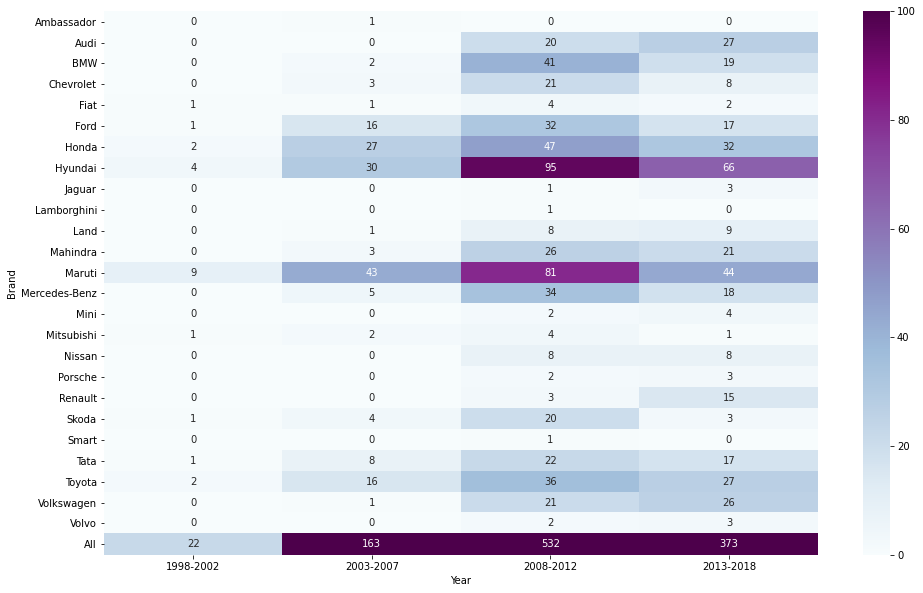

In [ ]:
# Plot with heatmap
plt.figure(figsize=(16,10))
sns.heatmap(mob_bekas_reindex.drop('All', axis=1), annot=True, cmap='BuPu', vmax=100, fmt='g')
plt.xlabel('Year')
plt.ylabel('Brand')
plt.show()

4. Berapa banyak mobil yang memiliki total jarak pemakaian di bawah 100.000 kilometer?

In [ ]:
soal_4 = df['Kilometers_Driven'] < 100000

In [ ]:
soal_4[soal_4 == True].count()

5470

5. Pada batas berapa kilometer total jarak pemakaian bisa dikategorikan sebagai rendah
atau tinggi? Sertakan argumen yang mendukung jawaban.

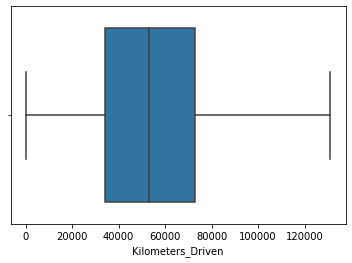

In [ ]:
sns.boxplot(df['Kilometers_Driven'][df['Kilometers_Driven'] < 600000], sym="")

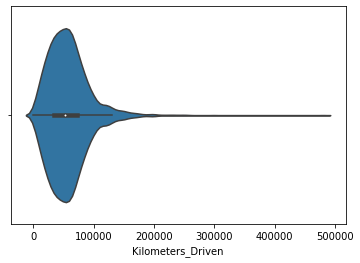

In [ ]:
sns.violinplot(df['Kilometers_Driven'][df['Kilometers_Driven'] < 600000])

1. Rendah apabila berada di bawah IQR
2. Tinggi apabila berada di atas IQR

In [ ]:
round(df['Kilometers_Driven'][df['Kilometers_Driven'] < 600000].describe(), 2)

count      6015.00
mean      57345.19
std       34990.41
min         171.00
25%       34000.00
50%       53000.00
75%       73000.00
max      480000.00
Name: Kilometers_Driven, dtype: float64

6. Apakah terdapat outlier pada kolom Kilometers_Driven? Sertakan argumen yang
mendukung jawaban.

In [ ]:
round(df['Kilometers_Driven'].describe()/1000, 2)

count       6.02
mean       58.74
std        91.27
min         0.17
25%        34.00
50%        53.00
75%        73.00
max      6500.00
Name: Kilometers_Driven, dtype: float64

In [ ]:
import numpy as np

In [ ]:
def show_total_outliers(df, col):
  quant = np.quantile(df[col], [0.25, 0.75])
  IQR = quant[1] - quant[0]
  upper_threshold = quant[1] + IQR * 1.5
  lower_threshold = quant[0] - IQR * 1.5
  lower_outlier = df[col] < lower_threshold
  upper_outlier = df[col] > upper_threshold
  return lower_outlier, upper_outlier

In [ ]:
print("Lower outlier :\n{}\n\nUpper outlier :\n{}".format(show_total_outliers(df, 'Kilometers_Driven')[0].value_counts(),
                                                          show_total_outliers(df, 'Kilometers_Driven')[1].value_counts()))


Lower outlier :
False    6019
Name: Kilometers_Driven, dtype: int64

Upper outlier :
False    5817
True      202
Name: Kilometers_Driven, dtype: int64


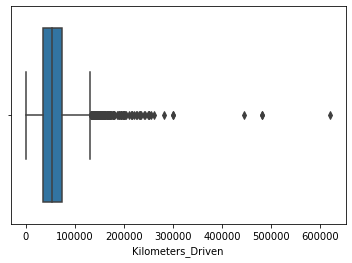

In [ ]:
sns.boxplot(df['Kilometers_Driven'][df['Kilometers_Driven'] < 650000])

7. Apakah tahun pembuatan mobil berpengaruh terhadap total jarak pemakaian? Sertakan
argumen yang mendukung jawaban.

In [ ]:
df[['Kilometers_Driven', 'Year']].corr()

,Kilometers_Driven,Year
Kilometers_Driven,1.000000,-0.173048
Year,-0.173048,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
standardized = StandardScaler()
standar_df = standardized.fit_transform(df[['Year', 'Kilometers_Driven']])

In [ ]:
scaled_df = pd.DataFrame(standar_df, columns=['Year', 'Kilometers_Driven'])
max(scaled_df['Kilometers_Driven'])

70.58045810025035

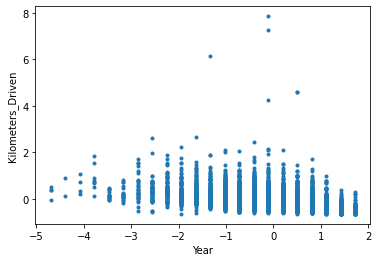

In [ ]:
plt.plot(scaled_df['Year'][scaled_df['Kilometers_Driven'] < max(scaled_df['Kilometers_Driven'])], 
         scaled_df['Kilometers_Driven'][scaled_df['Kilometers_Driven'] < max(scaled_df['Kilometers_Driven'])], marker='.', linestyle='none')
plt.xlabel('Year')
plt.ylabel('Kilometers_Driven')
plt.show()

In [ ]:
#Drop 202 outliers
df_nonoutlier = scaled_df[~show_total_outliers(scaled_df, 'Kilometers_Driven')[1]]

In [ ]:
print("Lower Outlier :", show_total_outliers(scaled_df, 'Year')[0].value_counts()[1])

Lower Outlier : 50


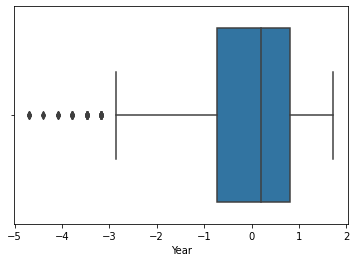

In [ ]:
sns.boxplot(scaled_df['Year'])

In [ ]:
df_nonoutlier = df_nonoutlier[~show_total_outliers(df_nonoutlier, 'Year')[0]]

In [ ]:
df_nonoutlier.shape

(5696, 2)

###Distribution Treatment

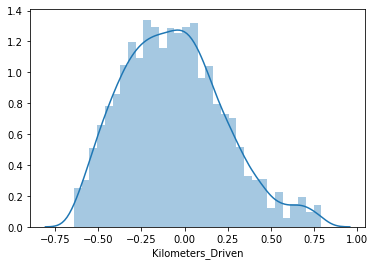

In [ ]:
# PMF
sns.distplot(df_nonoutlier['Kilometers_Driven'])

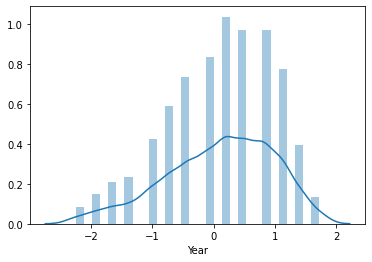

In [ ]:
sns.distplot(df_nonoutlier['Year'])

Hypothesis = Little skewed to the right

ECDF DISTRIBUTION EVALUATION

In [ ]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


In [ ]:
#For Kilometers_Driven
x, y = ecdf(df_nonoutlier['Kilometers_Driven'])
samples = np.random.normal(np.mean(df_nonoutlier['Kilometers_Driven']), np.std(df_nonoutlier['Kilometers_Driven']), 10000)
x_theor, y_theor = ecdf(samples)

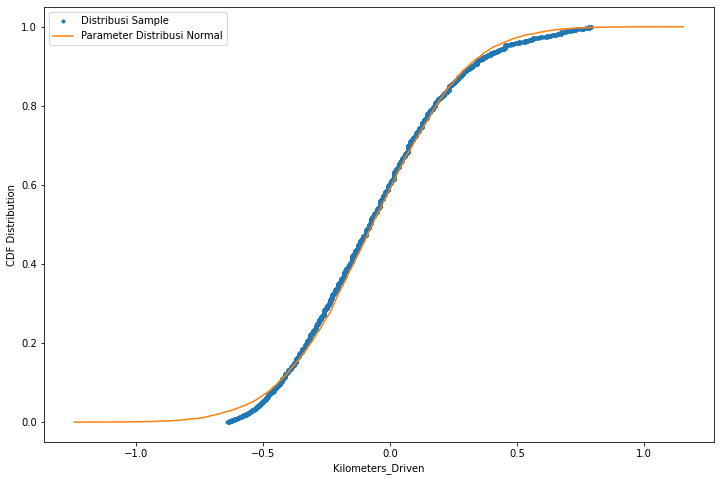

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(x, y, marker='.', linestyle='none', label='Distribusi Sample')
plt.plot(x_theor, y_theor, label='Parameter Distribusi Normal')
plt.xlabel('Kilometers_Driven')
plt.ylabel('CDF Distribution')
plt.legend()

In [ ]:
df_nonoutlier['Kilometers_Driven'].skew()

0.4325217195099588

ALMOST NORMAL !!!!

In [ ]:
#For Year column
x, y = ecdf(df_nonoutlier['Year'])
samples2 = np.random.normal(np.mean(df_nonoutlier['Year']), np.std(df_nonoutlier['Year']), 10000)
x_theor, y_theor = ecdf(samples2)

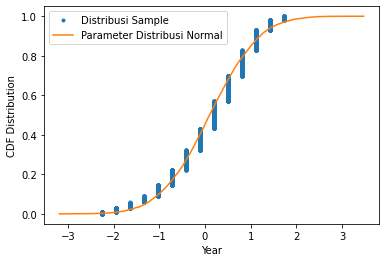

In [ ]:
plt.plot(x, y, marker='.', linestyle='none', label='Distribusi Sample')
plt.plot(x_theor, y_theor, label='Parameter Distribusi Normal')
plt.xlabel('Year')
plt.ylabel('CDF Distribution')
plt.legend()

In [ ]:
df_nonoutlier['Year'].skew()

-0.47260532700615054

Just a little skewed to the right with only -0.47 skew coef 



So do we really need treatment for these dist?
 Bulmer (1979) — a classic — suggests this rule of thumb:

    If skewness is less than −1 or greater than +1, the distribution is highly skewed.
    If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed.
    If skewness is between −½ and +½, the distribution is approximately symmetric.


Summary :
1. Kilometers Driven feature skewness coefficient == 0.43 < +1 & 0.43 > -1 -> Approx symm
2.Year skewness feature skewness coefficient == -0.47 > -0.5 & -0.47 < 0.5 -> Approx symm

###Linear Regression with numpy & statsmodels








In [ ]:
df_nonoutlier.shape

(5696, 2)

In [ ]:
df_nonoutlier.corr()

,Year,Kilometers_Driven
Year,1.000000,-0.502182
Kilometers_Driven,-0.502182,1.000000


In [ ]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

r = pearson_r(df_nonoutlier['Year'], df_nonoutlier['Kilometers_Driven'])
print(r)

-0.5021818882393765


Pearson Corr coef is -0.5
- Negative correlation


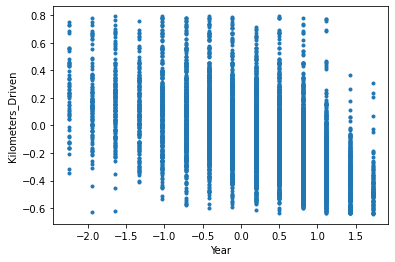

In [ ]:
plt.plot(df_nonoutlier['Year'], 
         df_nonoutlier['Kilometers_Driven'], marker='.', linestyle='none')
plt.xlabel('Year')
plt.ylabel('Kilometers_Driven')
plt.show()

Needs to reduce opacity of each data to see the pattern

In [ ]:
slope, intercept = np.polyfit(df_nonoutlier['Year'], df_nonoutlier['Kilometers_Driven'], 1)

In [ ]:
# mu = np.mean(df_nonoutlier['Year'])
# sigma = np.std(df_nonoutlier['Year'])
# x = np.random.normal(mu, sigma, len(df_nonoutlier))
x = np.array([-3, 3])
y = slope*x + intercept

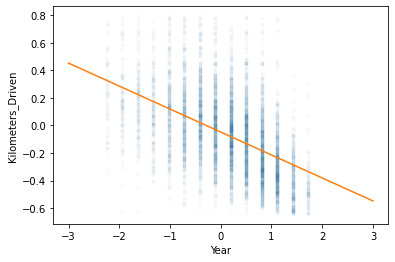

In [ ]:
plt.plot(df_nonoutlier['Year'], 
         df_nonoutlier['Kilometers_Driven'], 
         marker='.', linestyle='none', alpha=0.02)
plt.plot(x, y)
plt.xlabel('Year')
plt.ylabel('Kilometers_Driven')
plt.show()

Jitter the plot (discrete data plot treatment)

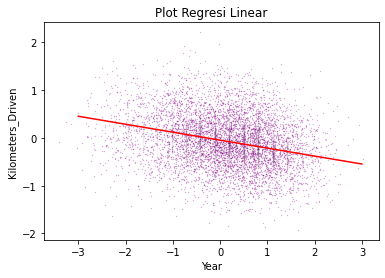

In [ ]:
x_jitter = df_nonoutlier['Year'] + np.random.normal(0, 0.5, size=len(df_nonoutlier))
y_jitter = df_nonoutlier['Kilometers_Driven'] + np.random.normal(0, 0.5, size=len(df_nonoutlier))

plt.plot(df_nonoutlier['Year'], 
         df_nonoutlier['Kilometers_Driven'], 
         marker='.', linestyle='none', alpha=0.02, markersize=0.7, color='purple')

plt.plot(x_jitter, y_jitter, marker='.', linestyle='none', alpha=0.4, markersize=0.7, color='purple')
plt.plot(x, y, color='r')
plt.xlabel('Year')
plt.ylabel('Kilometers_Driven')
plt.title('Plot Regresi Linear')
plt.show()

In [ ]:
# ols = np.linalg.lstsq(x, y)

In [ ]:
import statsmodels.api as sm

In [ ]:
p = df_nonoutlier['Kilometers_Driven']
f = df_nonoutlier['Year']

In [ ]:
f = sm.add_constant(f)
lr = sm.OLS(p, f).fit()
print(lr.params)
print(lr.summary())
summary = lr.summary()

const   -0.047931
Year    -0.166567
dtype: float64
                            OLS Regression Results                            
Dep. Variable:      Kilometers_Driven   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     1920.
Date:                Sun, 19 Jul 2020   Prob (F-statistic):               0.00
Time:                        11:22:08   Log-Likelihood:                -243.22
No. Observations:                5696   AIC:                             490.4
Df Residuals:                    5694   BIC:                             503.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

*p.s : R-squared == Adj. R-squared because there's only 1 feature. Adj. R-square is intended to eliminate non-usefull feature*

1. R-squared (coef. determ.) = 0.252, very small impact for Kilometers Dr
2. Year Coefficient value is small negative, means that Year feature only give a negative small impact to Kilometers Driven. Higher year value, lower Kilometers Driven, and vice versa.
3. Low std error means the accuracy of feature coefficient is high
4. Conf interval = 95% --> p-value < significance : Reject null hypothesis. Other word, there's a causation between year and kilometers driven, although its not very significant



In [ ]:
from scipy.stats import linregress

res = linregress(df_nonoutlier['Year'], df_nonoutlier['Kilometers_Driven'])
res

LinregressResult(slope=-0.16656665305361262, intercept=-0.047930655107760525, rvalue=-0.5021818882393764, pvalue=0.0, stderr=0.0038011489656656463)

LINEAR REGRESSION WITH SKLEARN

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
x = df_nonoutlier['Year']
y = df_nonoutlier['Kilometers_Driven']

In [ ]:
x = np.array(x).reshape((-1, 1))

In [ ]:
y.shape

(5696,)

In [ ]:
LR = LinearRegression().fit(x, y)
model_score = LR.score(x, y)

In [ ]:
print('coefficient of determination (R square):', model_score)

coefficient of determination (R square): 0.25218664887566555


In [ ]:
import scipy

In [ ]:
# F-test
F = np.var(x) / np.var(y)
df1 = len(x) - 1
df2 = len(y) - 1
alpha = 0.05
p_value = scipy.stats.f.cdf(F, df1, df2)
print(p_value)
if p_value > alpha:
    print('Reject the null hypothesis that Var(X) == Var(Y)')

0.9999999999999999
Reject the null hypothesis that Var(X) == Var(Y)


8. Berapa banyak mobil yang merupakan kepemilikan ketiga atau lebih?

In [ ]:
mobil_third = mobil_second['Owner_Type'][mobil_second['Owner_Type'] != 'Second']

In [ ]:
mobil_third.value_counts()

Third             113
Fourth & Above      9
Name: Owner_Type, dtype: int64

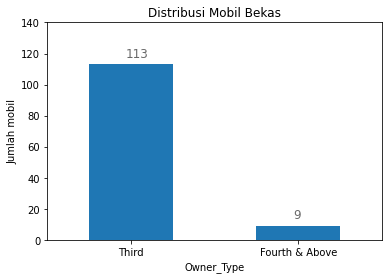

In [ ]:
ax2 = mobil_third.value_counts().plot(kind='bar')
plt.ylabel('Jumlah mobil')
plt.xlabel('Owner_Type')
plt.title('Distribusi Mobil Bekas')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 160, 20))


# Annotate bar chart
for i in ax2.patches:
    ax2.text(i.get_x()+.22, i.get_height()+4.8, \
            str(i.get_height()), fontsize=12,
                color='dimgrey')

9. Tipe bahan bakar apa yang memiliki mileage (konsumsi bahan bakar) paling hemat?

In [ ]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [ ]:
df[['Mileage', 'Fuel_Type']].sort_values('Mileage')

,Mileage,Fuel_Type
5119,0.0 kmpl,Petrol
1385,0.0 kmpl,Petrol
3061,0.0 kmpl,Petrol
6011,0.0 kmpl,Petrol
3044,0.0 kmpl,Petrol
...,...,...
557,9.9 kmpl,Petrol
3580,9.9 kmpl,Diesel
1288,9.9 kmpl,Petrol
4446,NaN,Electric


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [ ]:
df[['Mileage_int', 'Satuan']] = df['Mileage'].str.split(" ", expand=True)

In [ ]:
df['Mileage_int'] = pd.to_numeric(df['Mileage_int'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
 12  Mileage_int        6017 non-null   float64
 13  Satuan             6017 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 658.5+ KB


In [ ]:
# Drop 0 mileage (assumed as error data)
df['Mileage_int'] = df['Mileage_int'][df['Mileage_int'] > 0.00]

In [ ]:
df['Satuan'].value_counts()

kmpl     5951
km/kg      66
Name: Satuan, dtype: int64

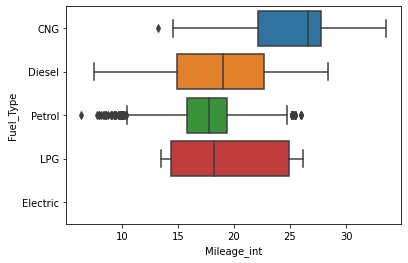

In [ ]:
sns.boxplot('Mileage_int', 'Fuel_Type', data=df)

In [ ]:
df['Mileage_int'].describe()

count    5949.000000
mean       18.342252
std         4.175475
min         6.400000
25%        15.300000
50%        18.200000
75%        21.100000
max        33.540000
Name: Mileage_int, dtype: float64

In [ ]:
df.groupby('Fuel_Type')['Mileage_int'].mean()

Fuel_Type
CNG         25.418036
Diesel      18.778682
Electric          NaN
LPG         19.385000
Petrol      17.679168
Name: Mileage_int, dtype: float64

In [ ]:
df.groupby('Fuel_Type')['Mileage_int'].min()

Fuel_Type
CNG         13.20
Diesel       7.50
Electric      NaN
LPG         13.45
Petrol       6.40
Name: Mileage_int, dtype: float64

Fuel Type's Outlier is assumed as an extreme data instead of error data. therefore, those outliers are included as a factor for conclusion

In [ ]:
# df[df['Seats'].isna()]

##10. Apa saja faktor-faktor yang mempengaruhi harga mobil bekas di India? Sertakan argumen yang mendukung jawaban.

Feature Selection approaches :
1. Correlation (Pearson Corr -> Cont Data)
2. Univariate Selection
3. Feature Importance
4. Permutation Importance (considering there are many of discrete data type)

### Data Cleaning

In [ ]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Mileage_int,Satuan
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,26.60,km/kg
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,19.67,kmpl
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,18.20,kmpl
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,20.77,kmpl
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,15.20,kmpl


In [ ]:
df.shape

(6019, 14)

In [ ]:
df['Owner_Type'].value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [ ]:
df_bekas = df[df['Owner_Type'] != 'First']

In [ ]:
features = df_bekas.drop(['Satuan', 'Mileage'], axis=1)
# predictor = df_bekas['Price']

In [ ]:
features.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,Mileage_int
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,1968 CC,140.8 bhp,5.0,17.74,15.20
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,1248 CC,74 bhp,5.0,1.95,22.30
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,2179 CC,115 bhp,5.0,17.50,NaN
21,Maruti S Cross DDiS 200 Alpha,Bangalore,2015,55392,Diesel,Manual,Second,1248 CC,88.5 bhp,5.0,8.25,23.65
27,Maruti Alto K10 2010-2014 VXI,Hyderabad,2013,54000,Petrol,Manual,Second,998 CC,67.1 bhp,5.0,2.75,20.92


In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1090 entries, 4 to 6016
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1090 non-null   object 
 1   Location           1090 non-null   object 
 2   Year               1090 non-null   int64  
 3   Kilometers_Driven  1090 non-null   int64  
 4   Fuel_Type          1090 non-null   object 
 5   Transmission       1090 non-null   object 
 6   Owner_Type         1090 non-null   object 
 7   Engine             1076 non-null   object 
 8   Power              1076 non-null   object 
 9   Seats              1072 non-null   float64
 10  Price              1090 non-null   float64
 11  Mileage_int        1065 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 110.7+ KB


In [ ]:
features['Engine'] = features['Engine'].str.split(" ", expand=True).fillna('0')
features['Power'] = features['Power'].str.split(" ", expand=True).fillna('0')
features['Name'] = features['Name'].str.split(" ", expand=True)

In [ ]:
features['Engine'] = features.Engine.astype(float)
features['Power'] = features.Power.str.replace('null', '0').astype(float)


In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1090 entries, 4 to 6016
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1090 non-null   object 
 1   Location           1090 non-null   object 
 2   Year               1090 non-null   int64  
 3   Kilometers_Driven  1090 non-null   int64  
 4   Fuel_Type          1090 non-null   object 
 5   Transmission       1090 non-null   object 
 6   Owner_Type         1090 non-null   object 
 7   Engine             1090 non-null   float64
 8   Power              1090 non-null   float64
 9   Seats              1072 non-null   float64
 10  Price              1090 non-null   float64
 11  Mileage_int        1065 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 110.7+ KB


In [ ]:
features.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,Mileage_int
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,1968.0,140.8,5.0,17.74,15.20
9,Tata,Chennai,2012,65932,Diesel,Manual,Second,1248.0,74.0,5.0,1.95,22.30
14,Land,Pune,2012,85000,Diesel,Automatic,Second,2179.0,115.0,5.0,17.50,NaN
21,Maruti,Bangalore,2015,55392,Diesel,Manual,Second,1248.0,88.5,5.0,8.25,23.65
27,Maruti,Hyderabad,2013,54000,Petrol,Manual,Second,998.0,67.1,5.0,2.75,20.92


In [ ]:
features['Seats'].replace(0, np.nan, inplace=True)

In [ ]:
features.dropna(inplace=True)

In [ ]:
features_Int = pd.get_dummies(features)

In [ ]:
features_Int.shape

(1052, 51)

In [ ]:
features_Int.select_dtypes(['float', 'int']).isna().any()

Year                 False
Kilometers_Driven    False
Engine               False
Power                False
Seats                False
Price                False
Mileage_int          False
dtype: bool

### Outlier and Distribution Treatment

In [ ]:
features_Int.select_dtypes(['float', 'int']).describe()

,Year,Kilometers_Driven,Engine,Power,Seats,Price,Mileage_int
count,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000
mean,2010.890684,73817.398289,1689.265209,113.854411,5.286122,7.311093,17.044838
std,3.413527,37265.157621,629.050597,60.046189,0.840731,9.804591,3.929385
min,1998.000000,3000.000000,624.000000,0.000000,2.000000,0.440000,6.400000
25%,2009.000000,49000.000000,1198.000000,74.000000,5.000000,2.400000,14.020000
50%,2011.000000,67810.000000,1497.000000,100.000000,5.000000,4.050000,17.000000
75%,2013.000000,90000.000000,1995.000000,141.100000,5.000000,7.727500,19.300000
max,2018.000000,262000.000000,5461.000000,560.000000,10.000000,120.000000,33.440000


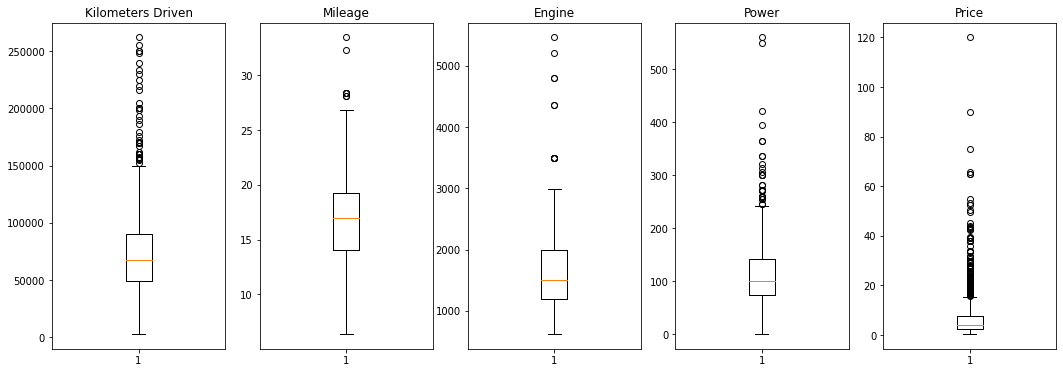

In [ ]:
# Scaling without Logaritmic Scale 

fig, ax = plt.subplots(1,5, figsize=(18, 6))
ax[0].boxplot(list(features_Int.Kilometers_Driven))
ax[0].set_title("Kilometers Driven")

ax[1].boxplot(features_Int.Mileage_int)
ax[1].set_title("Mileage")

ax[2].boxplot(list(features_Int.Engine))
ax[2].set_title("Engine")
    
ax[3].boxplot(list(features_Int.Power))
ax[3].set_title("Power")
    
ax[4].boxplot(list(features_Int.Price))
ax[4].set_title("Price")


plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


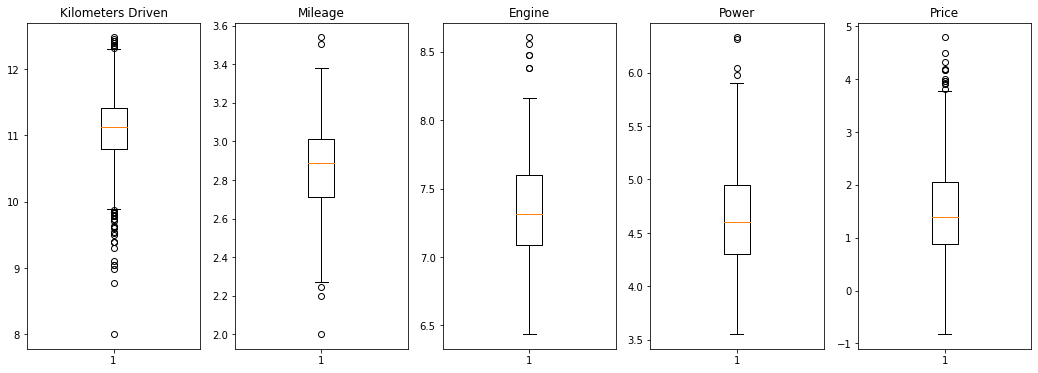

In [ ]:
# Scaling using Logarithmic Scale -> Reduce outliers

fig, ax = plt.subplots(1,5, figsize=(18, 6))
ax[0].boxplot(list(np.log(features_Int.Kilometers_Driven)))
ax[0].set_title("Kilometers Driven")

ax[1].boxplot(np.log1p(features_Int.Mileage_int))
ax[1].set_title("Mileage")

ax[2].boxplot(list(np.log1p(features_Int.Engine)))
ax[2].set_title("Engine")
    
ax[3].boxplot(list(np.log(features_Int.Power)))
ax[3].set_title("Power")
    
ax[4].boxplot(list(np.log(features_Int.Price)))
ax[4].set_title("Price")
    
plt.show()

In [ ]:
features_Int[features_Int['Price'] == 0]

,Year,Kilometers_Driven,Engine,Power,Seats,Price,Mileage_int,Name_Ambassador,Name_Audi,Name_BMW,Name_Chevrolet,Name_Fiat,Name_Ford,Name_Honda,Name_Hyundai,Name_Jaguar,Name_Lamborghini,Name_Land,Name_Mahindra,Name_Maruti,Name_Mercedes-Benz,Name_Mini,Name_Mitsubishi,Name_Nissan,Name_Porsche,Name_Renault,Name_Skoda,Name_Tata,Name_Toyota,Name_Volkswagen,Name_Volvo,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third


RuntimeWarning --> Power feature returns 0, needs another treatment
try : 1/np.sqrt()

Kilometers Driven needs treatment :
1. IQR
2. Imputation with mean

In [ ]:
print("Skew ", np.log(features_Int['Price']).skew())
print("kurt ", np.log(features_Int['Price']).kurt())

Skew  0.41160305683838533
kurt  0.06384273738497193


In [ ]:
print("Skew ", np.log(features_Int['Kilometers_Driven']).skew())
print("kurt ", np.log(features_Int['Kilometers_Driven']).kurt())

Skew  -0.7778916655122923
kurt  2.2909674945635277


In [ ]:
features_Int['Power'] = features_Int['Power'].mask(features_Int['Power'] == 0, features_Int['Power'].mean())

GLM log link for Price column

In [ ]:
# features_Int['Price_log'] = np.log1p(features_Int['Price'])
# features_Int['Power_log'] = 1/np.sqrt(features_Int.Power)
# features_Int['Engine_log'] = np.log(features_Int['Engine'])
# features_Int['Mileage_log'] = np.log(features_Int['Mileage_int'])

### Feature Selection

In [ ]:
X = features_Int.drop(['Price'], axis=1)
y = features_Int['Price']

In [ ]:
# y = np.log1p(y)
# X['Power'] = np.log10(X.Power)
# X['Engine'] = np.log10(X['Engine'])
# X['Mileage_int'] = np.log10(X['Mileage_int'])

In [ ]:
from sklearn.preprocessing import FunctionTransformer

In [ ]:
# transformer = FunctionTransformer(np.log, validate=True)

In [ ]:
# X = transformer.transform(X)

Univariate Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [ ]:
# Building model
fs = SelectKBest(score_func=f_regression, k=26)
X_selected = fs.fit(X, y)

In [ ]:
dfscores = pd.DataFrame(X_selected.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  
print(featureScores.nlargest(15,'Score'))  #print 10 best features

                  Features        Score
3                    Power  1364.026351
2                   Engine   785.690570
46     Transmission_Manual   456.756499
45  Transmission_Automatic   456.756499
15        Name_Lamborghini   151.111279
7                Name_Audi   137.111282
0                     Year   134.464948
42        Fuel_Type_Diesel   121.638868
44        Fuel_Type_Petrol   111.769399
16               Name_Land   102.510719
23            Name_Porsche    99.753940
8                 Name_BMW    76.206327
5              Mileage_int    73.561902
19      Name_Mercedes-Benz    54.002121
1        Kilometers_Driven    52.389345


Features Importances using ensemble ETR



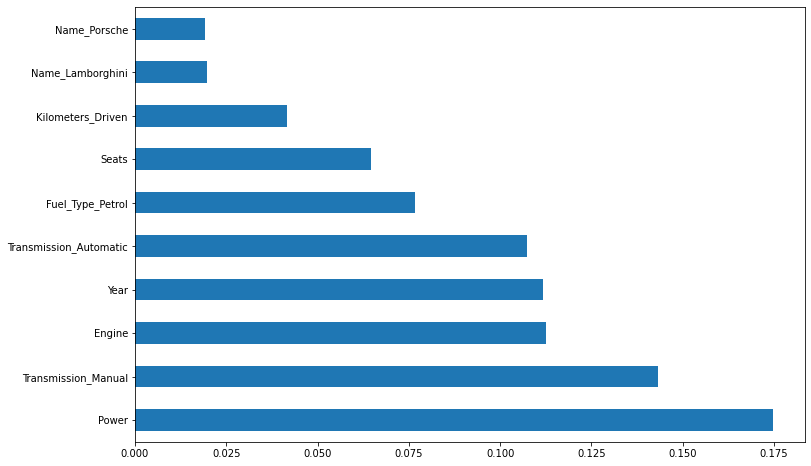

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X,y)
# print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(12, 8))
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Feature Importance Using RandomForestRegressor
- Not robust to outlier
- doesnt need scaling/ centering

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor()
rf.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

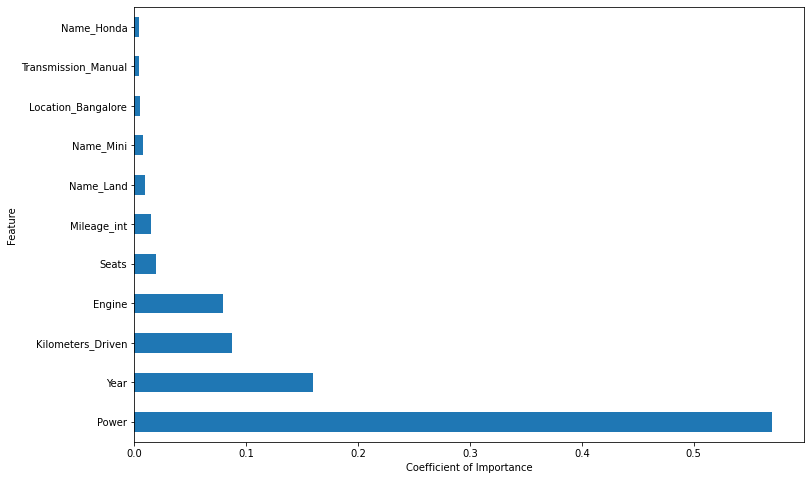

In [ ]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
plt.figure(figsize=(12, 8))
feat_importances.nlargest(11).plot(kind='barh')
plt.xlabel('Coefficient of Importance')
plt.ylabel('Feature')
plt.show()

Lasso Regularization as scaler to standardize data scale
- Main reason using this approach is to provide a principled way to reduce the number of features in a model
- It can shrink useless feature to 0 because every low coefficient (weight) of feature (close to zero) will be given a penalty
- Also, when features are correlated, LASSO will choose one or the other based on its performance in the particular data sample at hand.

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [ ]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [ ]:
lasso = Lasso(alpha=0.4)
lasso_coef = lasso.fit(scaled_X, y).coef_

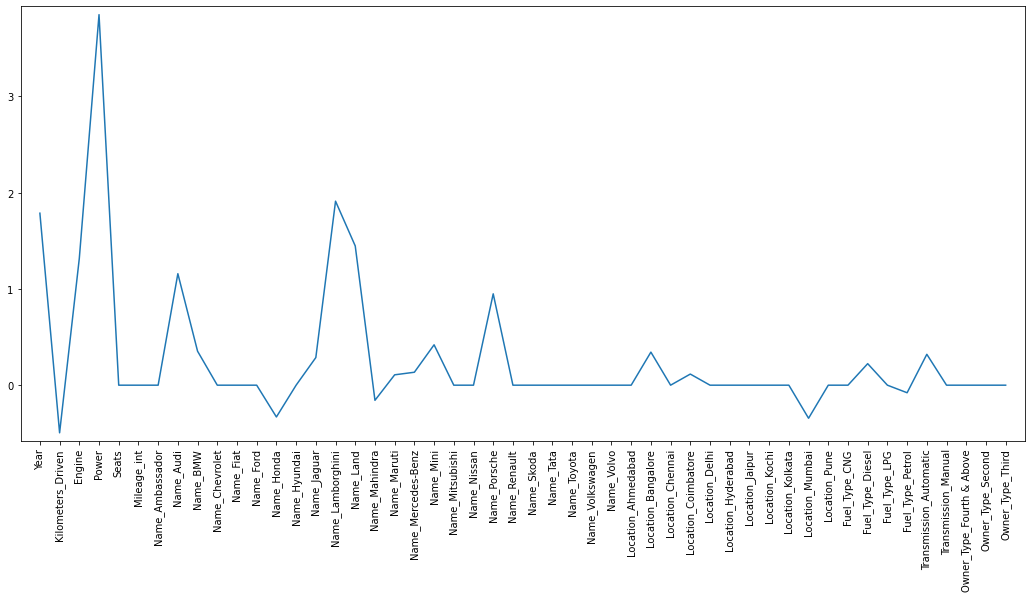

In [ ]:
plt.figure(figsize=(18,8))
plt.plot(range(len(X.columns)), lasso_coef)
plt.xticks(range(len(X.columns)), X.columns, rotation=90)
plt.margins(0.02)

plt.show()


In [ ]:
all_impact = {X.columns[x]:lasso_coef[x] for x in range(len(X.columns))}

In [ ]:
negative_impact = {k:v for (k,v) in all_impact.items() if v < 0}
positive_impact = {k:v for (k,v) in all_impact.items() if v > 0}

In [ ]:
impact = pd.DataFrame(list(all_impact.items()), columns=['Features', 'Scores'])

In [ ]:
impact = impact[impact['Scores'] != 0]

In [ ]:
impact = impact.set_index('Features').sort_values('Scores').reset_index()

In [ ]:
tendency = []
for i in range(len(impact)):
  if impact['Scores'][i] > 0:
    tendency.append('Positive')

  else:
    tendency.append('Negative')

In [ ]:
impact['Tendency'] = tendency

In [ ]:
impact_pivot = impact.pivot_table(values='Scores', index='Features', columns='Tendency').sort_values(['Positive', 'Negative'], ascending=[False, False]).fillna(0)

In [ ]:
impact_pivot

Tendency,Negative,Positive
Features,,
Power,0.000000e+00,3.848270
Name_Lamborghini,0.000000e+00,1.910988
Year,0.000000e+00,1.786253
Name_Land,0.000000e+00,1.446076
Engine,0.000000e+00,1.317131
Name_Audi,0.000000e+00,1.157936
Name_Porsche,0.000000e+00,0.948774
Name_Mini,0.000000e+00,0.419412
Name_BMW,0.000000e+00,0.352888


Note :
1. Small value of each feature above doesn't always mean small causation
2. It might be a nonlinear relationship

conclusion
1. Needs to examine and elaborates more --> solution : plot with scatterplot

## Plotting nonlinear features with polynomial regression (adding quadratic term)

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
features.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,Mileage_int
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,1968.0,140.8,5.0,17.74,15.20
9,Tata,Chennai,2012,65932,Diesel,Manual,Second,1248.0,74.0,5.0,1.95,22.30
21,Maruti,Bangalore,2015,55392,Diesel,Manual,Second,1248.0,88.5,5.0,8.25,23.65
27,Maruti,Hyderabad,2013,54000,Petrol,Manual,Second,998.0,67.1,5.0,2.75,20.92
29,Toyota,Mumbai,2007,262000,Diesel,Manual,Fourth & Above,2494.0,102.0,7.0,4.00,12.80


In [ ]:
new_df = features.drop(['Name', 'Location', 'Fuel_Type', 'Owner_Type'], axis=1).copy()
new_df['Transmission'] = new_df['Transmission'].map({'Automatic':1, 'Manual':0})

In [ ]:
new_df.head(3)

,Year,Kilometers_Driven,Transmission,Engine,Power,Seats,Price,Mileage_int
4,2013,40670,1,1968.0,140.8,5.0,17.74,15.20
9,2012,65932,0,1248.0,74.0,5.0,1.95,22.30
21,2015,55392,0,1248.0,88.5,5.0,8.25,23.65


In [ ]:
new_df['Year2'] = new_df['Year']**2


In [ ]:
formula = 'Price ~ Year + C(Transmission)'
results = smf.ols(formula, data=new_df).fit()
results.params

Intercept              -1521.682857
C(Transmission)[T.1]      11.137533
Year                       0.758777
dtype: float64

In [ ]:
grouped1 = new_df.groupby('Year')
y_grouped1 = grouped1['Price'].mean()

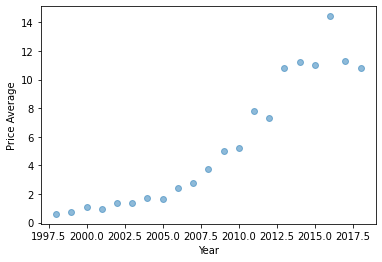

In [ ]:
plt.plot(y_grouped1, 'o', alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Price Average')
plt.show()

In [ ]:
new_df['Kilometers_Driven'] = new_df['Kilometers_Driven'][new_df['Kilometers_Driven'] > 0]

In [ ]:
bin_labels = ['Very Low', 'Low', 'Middle', 'High', 'Very High']

new_df['Kilometers_Driven_qcut'] = pd.qcut(new_df['Kilometers_Driven'],
                                q=[0, .2, .4, .6, .8, 1],
                                labels=bin_labels)

In [ ]:
new_df.head()

,Year,Kilometers_Driven,Transmission,Engine,Power,Seats,Price,Mileage_int,Year2,Kilometers_Driven_qcut
4,2013,40670,1,1968.0,140.8,5.0,17.74,15.20,4052169,Very Low
9,2012,65932,0,1248.0,74.0,5.0,1.95,22.30,4048144,Middle
21,2015,55392,0,1248.0,88.5,5.0,8.25,23.65,4060225,Low
27,2013,54000,0,998.0,67.1,5.0,2.75,20.92,4052169,Low
29,2007,262000,0,2494.0,102.0,7.0,4.00,12.80,4028049,Very High


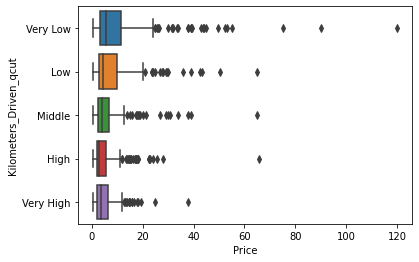

In [ ]:
sns.boxplot(new_df['Price'], new_df['Kilometers_Driven_qcut'])

In [ ]:
formula = 'Price ~ Kilometers_Driven'
results = smf.ols(formula, data=new_df).fit()
results.params

Intercept            11.544980
Kilometers_Driven    -0.000057
dtype: float64

In [ ]:
grouped1 = new_df.groupby('Kilometers_Driven')
y_grouped1 = grouped1['Price'].mean()

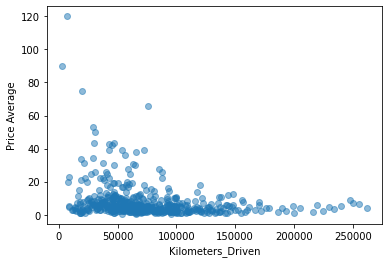

In [ ]:
plt.plot(y_grouped1, 'o', alpha=0.5)
plt.xlabel('Kilometers_Driven')
plt.ylabel('Price Average')
plt.show()

In [ ]:
formula = 'Price ~ Year + Year2 + C(Transmission)'
results = smf.ols(formula, data=new_df).fit()

In [ ]:
results.params

Intercept               167062.306311
C(Transmission)[T.1]        11.208363
Year                      -166.990535
Year2                        0.041730
dtype: float64

In [ ]:
predict_df = pd.DataFrame()
predict_df['Year'] = np.arange(1998, 2019)
predict_df['Year2'] = predict_df['Year']**2

predict_df['Transmission'] = 1 # automatic
pred1 = results.predict(predict_df)


In [ ]:
predict_df.head()

,Year,Year2,Transmission
0,1998,3992004,1
1,1999,3996001,1
2,2000,4000000,1
3,2001,4004001,1
4,2002,4008004,1


In [ ]:
predict_df['Transmission'] = 0 #Manual
pred2 = results.predict(predict_df)

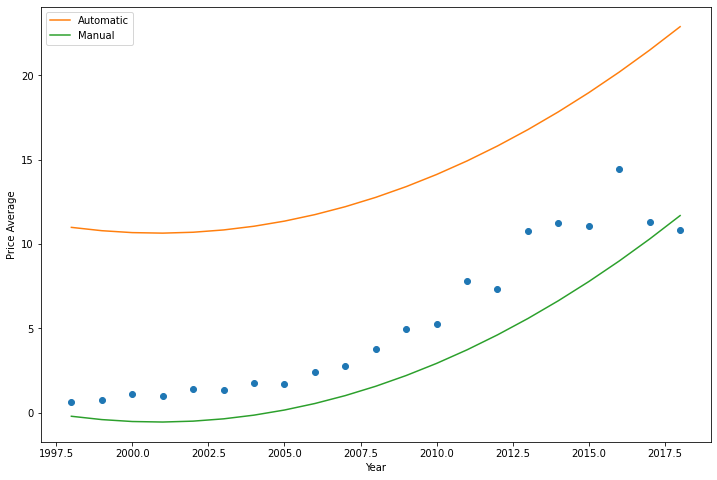

<Figure size 1152x864 with 0 Axes>

In [ ]:
grouped = new_df.groupby('Year')
y_grouped = grouped['Price'].mean()

plt.figure(figsize=(12, 8))
plt.plot(y_grouped, 'o')
plt.plot(predict_df['Year'], pred1, label='Automatic')
plt.plot(predict_df['Year'], pred2, label='Manual')
plt.xlabel('Year')
plt.ylabel('Price Average')
plt.legend()

plt.figure(figsize=(16, 12))
plt.show()

Automatic Transmission more affects the price (above the average of price !) than Manual Transmission. 
With T.1 coefficient = 11.208363, means that Automatic Transmission is affecting 11.2 of price average 

## SELECT TOP 12 FEATURES

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
rfe_gb = RFE(estimator=GradientBoostingRegressor(), n_features_to_select=10)
rfe_gb.fit(X, y)
rfe_gb = rfe_gb.support_


In [ ]:
rfe_rf = RFE(estimator=RandomForestRegressor(), n_features_to_select=10)
rfe_rf.fit(X, y)

rf_mask = rfe_rf.support_

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
lcv = LassoCV()
lcv.fit(X, y)
print('Optimal alpha = {0:.3f}'.format(lcv.alpha_))

Optimal alpha = 79.574


In [ ]:
r_squared = lcv.score(scaled_X, y)
print('The model explains {0:.1%} of the X variance'.format(r_squared))

The model explains -149.3% of the X variance


In [ ]:
lcv_mask = lcv.coef_ != 0
print('{} features out of {} selected'.format(sum(lcv_mask), len(lcv_mask)))

3 features out of 50 selected


In [ ]:
votes = np.sum([rfe_gb, rf_mask, lcv_mask], axis=0)

print(votes)

[2 3 3 3 1 2 0 1 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 1 0 0 0]


In [ ]:
mask = votes >= 1

In [ ]:
reduced_X = X.loc[:, mask]

In [ ]:
reduced_X.columns

Index(['Year', 'Kilometers_Driven', 'Engine', 'Power', 'Seats', 'Mileage_int',
       'Name_Audi', 'Name_Land', 'Name_Mini', 'Location_Bangalore',
       'Fuel_Type_Diesel', 'Transmission_Automatic', 'Transmission_Manual'],
      dtype='object')

In [ ]:
new_df.dtypes

Year                         int64
Kilometers_Driven            int64
Transmission                 int64
Engine                     float64
Power                      float64
Seats                      float64
Price                      float64
Mileage_int                float64
Year2                        int64
Kilometers_Driven_qcut    category
dtype: object